### Импорты используемых библиотек:

In [28]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

Получаем список имен президентов и содержимое файлов датасета:

In [ ]:
path = "../data/addresses/"

In [ ]:
presidents = []
contents = []

In [ ]:
for _, _, files in os.walk(path):
   for name in files:
      presidents.append(' '.join(name.split()[:2]))
        
      with open(path + name, 'r') as file:
          contents.append(file.read())

In [5]:
presidents

Error: KeyboardInterrupt

In [ ]:
for text in contents:
    print(text.split()[:10])

In [7]:
texts = pd.DataFrame({"President": presidents, "Text": contents})

In [8]:
texts

,President,Text
0,Abraham Lincoln,\n Fellow-Citizens of the Senate and House of ...
1,Abraham Lincoln,\nFellow-Citizens of the Senate and House of R...
2,Abraham Lincoln,\nFellow-Citizens of the Senate and House of R...
3,Abraham Lincoln,\nFellow-Citizens of the Senate and House of R...
4,Andrew Jackson,\nFellow Citizens of the Senate and of the Hou...
...,...,...
219,Woodrow Wilson,\nGentlemen of the Congress:\nIn fulfilling at...
220,Woodrow Wilson,\nGENTLEMEN OF THE CONGRESS:\nSince I last had...
221,Woodrow Wilson,\nGENTLEMEN OF THE CONGRESS:\nWhen I addressed...
222,Woodrow Wilson,\nGentlemen of the Congress:\nThe session upon...


,Text
President,
Abraham Lincoln,4
Andrew Jackson,8
Andrew Johnson,4
Barack Obama,8
Benjamin Harrison,4
Calvin Coolidge,6
Chester A.,4
Donald J.,3
Dwight D.,8


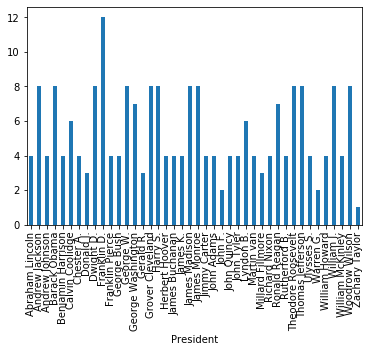

In [9]:
summary = texts.groupby("President").count()
ax = summary.plot.bar(y='Text')
ax.get_legend().remove()
summary

Разобьем текст на слова:

In [27]:
words = re.findall('[A-Za-zА-ЯЁа-яё]+-[A-Za-zА-ЯЁа-яё]+|[A-Za-zА-ЯЁа-яё]+', texts.Text.iloc[0])
words

['Fellow-Citizens',
 'of',
 'the',
 'Senate',
 'and',
 'House',
 'of',
 'Representatives',
 'Since',
 'your',
 'last',
 'annual',
 'assembling',
 'another',
 'year',
 'of',
 'health',
 'and',
 'bountiful',
 'harvests',
 'has',
 'passed',
 'and',
 'while',
 'it',
 'has',
 'not',
 'pleased',
 'the',
 'Almighty',
 'to',
 'bless',
 'us',
 'with',
 'a',
 'return',
 'of',
 'peace',
 'we',
 'can',
 'but',
 'press',
 'on',
 'guided',
 'by',
 'the',
 'best',
 'light',
 'He',
 'gives',
 'us',
 'trusting',
 'that',
 'in',
 'His',
 'own',
 'good',
 'time',
 'and',
 'wise',
 'way',
 'all',
 'will',
 'yet',
 'be',
 'well',
 'The',
 'correspondence',
 'touching',
 'foreign',
 'affairs',
 'which',
 'has',
 'taken',
 'place',
 'during',
 'the',
 'last',
 'year',
 'is',
 'herewith',
 'submitted',
 'in',
 'virtual',
 'compliance',
 'with',
 'a',
 'request',
 'to',
 'that',
 'effect',
 'made',
 'by',
 'the',
 'House',
 'of',
 'Representatives',
 'near',
 'the',
 'close',
 'of',
 'the',
 'last',
 'session'

In [41]:
counter=CountVectorizer(token_pattern=r'[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+')
res=counter.fit_transform(texts.Text.tolist())

print(counter.vocabulary_)

related': 21521, 'untapped': 24845, 'stave': 22076, 'bug': 2967, 'headache': 10620, 'tames': 23002, 'engulfed': 7760, 'serbian': 20863, 'kosovo': 13037, 'wye': 26107, 'ladin': 13084, 'kenya': 12932, 'jeff': 12705, 'taliaferro': 22987, 'dominicans': 7001, 'sammy': 20279, 'sosa': 21670, 'felons': 8856, 'stalkers': 21976, 'crime-mapping': 5339, 'mug': 15013, 'juveniles': 12883, 'horrified': 11019, 'heartbroken': 10656, 'jonesboro': 12781, 'paducah': 16425, 'edinboro': 7333, 'suzann': 22831, 'passionately': 16635, 'canyons': 3223, 'warming': 25470, 'hint': 10858, 'livability': 13603, 'tutor': 24101, 'fema': 8859, 'rosa': 20067, 'ancestry': 990, 'gender': 9837, 'counts': 5209, 'energizing': 7713, 'mayflower': 14279, 'harriet': 10549, 'tubman': 24056, 'star-spangled': 22010, 'wondered': 25945, 'hopefulness': 10997, 'mountaintop': 14973, 'synagogues': 22912, 'cd': 3403, 'v-chip': 25006, 'censorship': 3438, 'upbringing': 24898, 'vchip': 25090, 'superhighway': 22657, 'designer': 6212, 'jackets'